# Exploratory data analysis
### Ivaylo Ivanov and Aleksandar Georgiev

### Overview

The goal of this task is to explore and analyze datasets using visualization. 

The main tools used in this notebook are pandas, seaborn and matplotlib. We use them to create useful visualizations on our datasets, which will help us find correlations and tendencies in our data. This explorating will later be useful when creating a recipe recommondation model.

To begin, we import the libraries we are going to use:

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

Afterwards, we set pandas to display all columns and load the dataframes that we created in the previous step (data cleaning and aggregation). These datasets contain all of the information that will be useful for finding correlations.

In [42]:
pd.set_option('display.max_columns', None)

recipe_cooktime = pd.read_csv('./exp/recipe_cooktime.csv')
recipe_ingredient = pd.read_csv('./exp/recipe_ingredient.csv')
recipe_nutrition = pd.read_csv('./exp/recipe_nutrition.csv')

# Use the recipe id as an index
recipe_nutrition.set_index("recipe_id", inplace=True)

The first thing to take into consideration when following a recipe is cooking time. Here we plot the density of cooking times contained in our dataset:

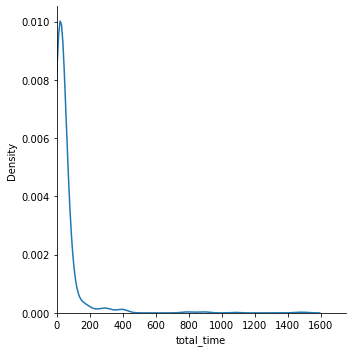

In [104]:
recipe_cooktime['total_time'] = recipe_cooktime['prep_min'] + recipe_cooktime['cook_min']
sns.displot(x = recipe_cooktime['total_time'], kind="kde").set(xlim=(0, 1750));

We can conclude from this plot that the majority of recipes take less than 200 minutes to complete, however there are recipes that take up to 1600 minutes.

Next up, we will investigate whether recipes with more ingredients contain more calories:

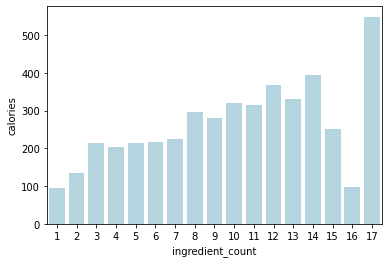

In [44]:
ingredient_calories = pd.DataFrame(recipe_ingredient.groupby(["recipe_id"])["ingredient_id"].count())
ingredient_calories['ingredient_count'] = ingredient_calories['ingredient_id']
ingredient_calories.drop('ingredient_id', axis=1, inplace = True)
ingredient_calories['calories'] = recipe_nutrition['calories']

sns.barplot(data = ingredient_calories, x='ingredient_count', y='calories', color='lightblue', errwidth=0);

We can conclude that more ingredients generally mean more calories.

Next up, we will investigate the number of calories for the recipes:

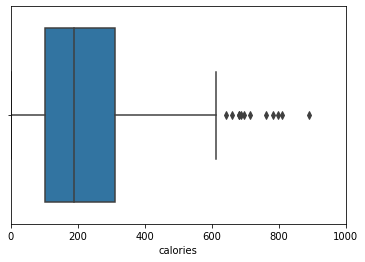

In [112]:
sns.boxplot(data=recipe_nutrition, x='calories').set(xlim=(0,1000));

Here we can see that the median caloric value for a recipe is about 200 and most recipes are contained in the 100-300 range, however some recipes contain more than 600 calories per serving.

Furthermore, we will inspect whether there is a correlation between number of ingredients in a recipe and cooking time:

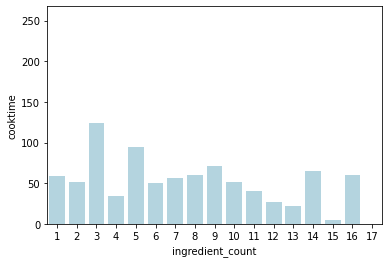

In [46]:
ingredient_cooktime = pd.DataFrame(recipe_ingredient.groupby(["recipe_id"])["ingredient_id"].count())
ingredient_cooktime['ingredient_count'] = ingredient_cooktime['ingredient_id']
ingredient_cooktime.drop('ingredient_id', axis=1, inplace = True)
ingredient_cooktime['cooktime'] = recipe_cooktime['prep_min'] + recipe_cooktime['cook_min']

sns.barplot(data = ingredient_cooktime, x='ingredient_count', y='cooktime', color='lightblue', errwidth=0);

We can not establish a correlation between these two variables.

Next up, we will visualize the macronutrient content in our recipes:

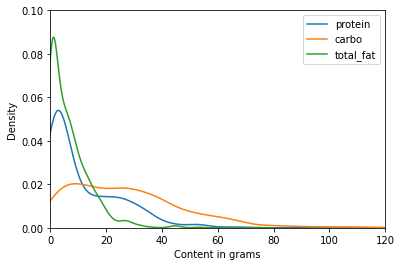

In [121]:
recipe_nutrition['protein'].plot.kde(legend=True)
recipe_nutrition['carbo'].plot.kde(legend=True)
recipe_nutrition['total_fat'].plot.kde(xlim=[0, 120], ylim=[0, 0.1], legend=True).set_xlabel('Content in grams');

We can see that our recipes generally contain less fat. Carbohydrates are approximately evenly distributed in the 0-40g range. Most od our recipes are sadly also low in protein.

Next up we will examine the number of ingredients used in our dataset by category:

In [90]:
pd.DataFrame(recipe_ingredient.groupby(["category"])['name'].count().sort_values(ascending=False))

,name
category,
spices and seasonings,973
fresh vegetables,743
baking products,390
dairy,330
oils and fats,195
beverages,171
meat/poultry,169
fresh fruit,160
condiments/sauces,158


We can see that the most used ingredients in our recipes are spices and seasonings, fresh vegetables, baking products, dairy, oils and fats.

Finally, we will examine the servings created by our recipes:

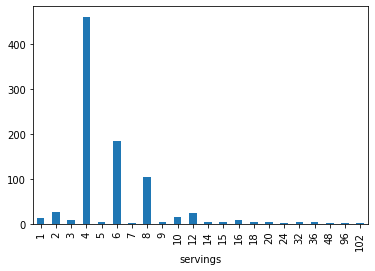

In [98]:
recipe_cooktime.groupby('servings')['recipe_id'].count().plot(kind='bar');

Most of the recipes will yield 4-8 servings, but there are some that yield more, usually multiples of 12.